In [1]:
import math
from itertools import combinations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
# distance measure
# can be replaced by np.linalg.norm function of numpy
def L(x, y, p=2):
    if len(x) == len(y) and len(x) > 1:
        sum = 0
        for i in range(len(x)):
            sum += math.pow(abs(x[i] - y[i]), p)
        return math.pow(sum, 1 / p)
    else:
        return 0

In [3]:
# data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
# data = np.array(df.iloc[:100, [0, 1, -1]])

In [4]:
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


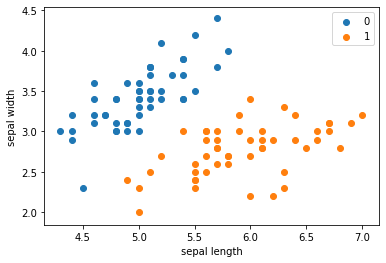

In [5]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
# plt.scatter(df[100:150]['sepal length'], df[100:150]['sepal width'], label='2')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [6]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
class KNN:
    
    def __init__(self, X_train, y_train, n_neighbours=3, p=2):
        """
        @parameter n_neighbours: count of neighbours, defualt 3
        @parameter p: to choose the measurement of distance, default 2
        """
        self.X_train = X_train
        self.y_train = y_train
        self.n = n_neighbours
        self.p = p
    
    def predict(self, X):
        
        # fetch n points
        knn_list = []
        for i in range(self.n):
            dist = np.linalg.norm((self.X_train[i] - X), ord=self.p)
            knn_list.append((dist, self.y_train[i]))
        for i in range(self.n, len(self.X_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])
        
        # calculate and predict
        knn_types = [k[-1] for k in knn_list]
        max_counter = Counter(knn_types)
        ret = sorted(max_counter.items(), key=lambda x: x[1])[-1][0]
        return ret

    def test(self, X_test, y_test):
        right_count = 0
        n = 10
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / len(X_test)

In [8]:
knn_model = KNN(X_train, y_train)

In [9]:
print("* Acc: %.2f%%" % (100*knn_model.test(X_test, y_test)))

* Acc: 100.00%


In [10]:
test_point = [6.0, 3.0]
print('Test Point: {}'.format(knn_model.predict(test_point)))

Test Point: 1.0


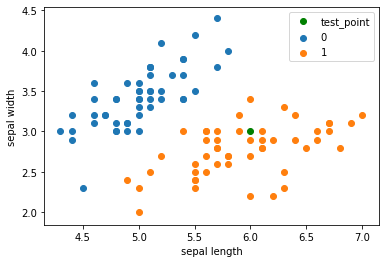

In [11]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'go', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [12]:
# KD-Tree

class KdNode(object):
    def __init__(self, dom_elt, split, left, right):
        self.dom_elt = dom_elt
        self.split = split
        self.left = left
        self.right = right 


class KdTree(object):
    def __init__(self, data):
        k = len(data[0])  # dim of data

        def CreateNode(split, data_set):
            if not data_set:
                return None
            
            data_set.sort(key=lambda x: x[split])
            split_pos = len(data_set) // 2
            median = data_set[split_pos]
            split_next = (split + 1) % k 

            return KdNode(
                median,
                split,
                CreateNode(split_next, data_set[:split_pos]),
                CreateNode(split_next, data_set[split_pos + 1:]))

        self.root = CreateNode(0, data)

def preorder(root):
    print(root.dom_elt)
    if root.left:
        preorder(root.left)
    if root.right:
        preorder(root.right) 

In [13]:
from math import sqrt
from collections import namedtuple

result = namedtuple("Result_tuple",
                    "nearest_point  nearest_dist  nodes_visited")

def find_nearest(tree, point):
    k = len(point)

    def travel(kd_node, target, max_dist):
        if kd_node is None:
            return result([0] * k, float("inf"), 0)

        nodes_visited = 1

        s = kd_node.split
        pivot = kd_node.dom_elt

        if target[s] <= pivot[s]: 
            nearer_node = kd_node.left
            further_node = kd_node.right 
        else: 
            nearer_node = kd_node.right
            further_node = kd_node.left

        temp1 = travel(nearer_node, target, max_dist)

        nearest = temp1.nearest_point
        dist = temp1.nearest_dist

        nodes_visited += temp1.nodes_visited

        if dist < max_dist:
            max_dist = dist

        temp_dist = abs(pivot[s] - target[s])
        if max_dist < temp_dist:
            return result(nearest, dist, nodes_visited)

        temp_dist = sqrt(sum((p1 - p2)**2 for p1, p2 in zip(pivot, target)))

        if temp_dist < dist: 
            nearest = pivot
            dist = temp_dist 
            max_dist = dist

        temp2 = travel(further_node, target, max_dist)

        nodes_visited += temp2.nodes_visited
        if temp2.nearest_dist < dist: 
            nearest = temp2.nearest_point
            dist = temp2.nearest_dist 

        return result(nearest, dist, nodes_visited)

    return travel(tree.root, point, float("inf")) 

In [14]:
data = [[2,3],[5,4],[9,6],[4,7],[8,1],[7,2]]
kd = KdTree(data)
preorder(kd.root)

[7, 2]
[5, 4]
[2, 3]
[4, 7]
[9, 6]
[8, 1]


In [15]:
from time import clock
from random import random

def random_point(k):
    return [random() for _ in range(k)]
 
def random_points(k, n):
    return [random_point(k) for _ in range(n)]     

In [16]:
ret = find_nearest(kd, [3,4.5])
print (ret)

Result_tuple(nearest_point=[2, 3], nearest_dist=1.8027756377319946, nodes_visited=4)


In [17]:
N = 400000
t0 = clock()
kd2 = KdTree(random_points(3, N))
ret2 = find_nearest(kd2, [0.1,0.5,0.8]) 
t1 = clock()
print ("time: ",t1-t0, "s")
print (ret2)

/home/jonathanwang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


time:  4.8570720000000005 s
Result_tuple(nearest_point=[0.09753395580345359, 0.5005116443709979, 0.7981258933406379], nearest_dist=0.003139335871224955, nodes_visited=36)


/home/jonathanwang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """
